In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read/preparation of data

In [2]:
def get_average_data(data):
    average_data = np.zeros((len(data)//8,len(data[0]))) #new sample = average of 8 consecutive sample
    
    #calculate average
    k = 0
    n = 0
    for i in range(len(data)): 
        average_data[k] += data[i]
        
        if (n == 7):
            average_data[k] /= 8
            k += 1
            n = 0
        else:
            n += 1
            
    return average_data

In [3]:
#Read all training samples
subject1_t1 = np.loadtxt("data_psd/train_subject1_psd01.asc")
subject1_t2 = np.loadtxt("data_psd/train_subject1_psd02.asc")
subject1_t3 = np.loadtxt("data_psd/train_subject1_psd03.asc")

subject2_t1 = np.loadtxt("data_psd/train_subject2_psd01.asc")
subject2_t2 = np.loadtxt("data_psd/train_subject2_psd02.asc")
subject2_t3 = np.loadtxt("data_psd/train_subject2_psd03.asc")

subject3_t1 = np.loadtxt("data_psd/train_subject3_psd01.asc")
subject3_t2 = np.loadtxt("data_psd/train_subject3_psd02.asc")
subject3_t3 = np.loadtxt("data_psd/train_subject3_psd03.asc")

test1 = np.loadtxt("data_psd/test_subject1_psd04.asc")
test2 = np.loadtxt("data_psd/test_subject2_psd04.asc")
test3 = np.loadtxt("data_psd/test_subject3_psd04.asc")

labels1 = np.loadtxt("data_psd/labels1.asc")
labels2 = np.loadtxt("data_psd/labels2.asc")
labels3 = np.loadtxt("data_psd/labels3.asc")

subject1 = np.concatenate((subject1_t1, subject1_t2, subject1_t3), axis=0)
subject2 = np.concatenate((subject2_t1, subject2_t2, subject2_t3), axis=0)
subject3 = np.concatenate((subject3_t1, subject3_t2, subject3_t3), axis=0)

test = np.concatenate((test1,test2,test3), axis=0)
labels = np.concatenate((labels1,labels2,labels3), axis=0)

#add labels to data
raw_test = np.zeros((len(test),len(test[0])+1))
raw_test[:,:-1] = test
raw_test[:,96] = labels

raw_training = np.concatenate((subject1,subject2,subject3), axis=0)

In [4]:
training = get_average_data(raw_training)
test = get_average_data(raw_test)

# For observing the difference in accuracy prediction between subjects
n_test1 = len(test1)//8
n_test2 = len(test2)//8
n_test3 = len(test3)//8

test_subject1 = test[0:n_test1]
test_subject2 = test[n_test1:n_test1+n_test2]
test_subject3 = test[n_test1+n_test2::]

print(len(test_subject1))
print(len(test_subject2))
print(len(test_subject3))

print(len(test), len(test_subject1) + len(test_subject2) + len(test_subject3))

438
434
436
1308 1308


# 2. Data visualization/preprocess

In [5]:
# dataframe creation
data = pd.DataFrame(training)
data[96] = data[96].replace([2.0, 3.0, 7.0], ['left','right', 'word'])
data['Class'] = data[96]
data = data.drop([96], axis=1)

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,Class
0,0.005675,0.006918,0.009756,0.009997,0.008646,0.003083,0.003069,0.006235,0.004615,0.002894,...,0.012659,0.009407,0.007847,0.007736,0.004404,0.003209,0.003080,0.007394,0.005682,word
1,0.012367,0.019696,0.013642,0.005683,0.007301,0.004046,0.004780,0.013030,0.006524,0.004758,...,0.006319,0.008278,0.006927,0.008400,0.006167,0.003709,0.003443,0.005401,0.004377,word
2,0.016052,0.018407,0.010792,0.006479,0.007477,0.004350,0.003174,0.006212,0.001975,0.001382,...,0.004900,0.006082,0.007944,0.008053,0.014581,0.007726,0.002044,0.003796,0.002304,word
3,0.022011,0.024230,0.012957,0.007000,0.004942,0.005518,0.007626,0.005048,0.001655,0.002822,...,0.016382,0.006341,0.006907,0.003319,0.006925,0.004250,0.001662,0.002987,0.002854,word
4,0.018043,0.013725,0.005477,0.005104,0.005579,0.007084,0.007648,0.005296,0.002568,0.004957,...,0.012551,0.005926,0.005552,0.003130,0.006827,0.004613,0.001993,0.001924,0.001642,word


In [17]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,...,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,0.021456,0.023911,0.019405,0.010401,0.007321,0.006625,0.006224,0.005672,0.004678,0.003915,...,0.014789,0.011464,0.009759,0.008608,0.007385,0.006430,0.005546,0.004871,0.004266,0.003668
std,0.015136,0.020130,0.014673,0.006391,0.004371,0.004134,0.003800,0.003510,0.002836,0.002605,...,0.008030,0.006564,0.005584,0.005076,0.004457,0.003948,0.003308,0.003060,0.002721,0.002409
min,0.001590,0.001153,0.001659,0.000854,0.000356,0.000533,0.000328,0.000454,0.000389,0.000274,...,0.001063,0.001216,0.001107,0.000511,0.000613,0.000632,0.000496,0.000189,0.000275,0.000334
25%,0.011705,0.011077,0.009596,0.005916,0.004272,0.003790,0.003605,0.003247,0.002659,0.002106,...,0.009085,0.006913,0.005796,0.005136,0.004216,0.003696,0.003153,0.002768,0.002377,0.002009
50%,0.017543,0.017318,0.015275,0.009053,0.006445,0.005641,0.005397,0.004900,0.004039,0.003263,...,0.013120,0.010134,0.008654,0.007503,0.006491,0.005645,0.004852,0.004183,0.003652,0.003122
75%,0.026190,0.029095,0.024602,0.013309,0.009350,0.008439,0.007832,0.007219,0.005993,0.005027,...,0.018721,0.014482,0.012497,0.010985,0.009490,0.008193,0.007129,0.006157,0.005427,0.004774
max,0.169052,0.154352,0.139760,0.083383,0.083631,0.061253,0.044344,0.045037,0.025920,0.022354,...,0.102134,0.074045,0.063084,0.073190,0.059685,0.054842,0.033016,0.037404,0.030816,0.041913


In [8]:
# apply transformations to data for posterior observation

data_transformed = data.copy()
for i in range(0,len(data.columns)-1): 
    
    # log
    x = np.log(data[i])  
    
    # standarization
    x = (x - x.mean())/x.std()
    
    data_transformed[i] = x

In [84]:
# plot configuration
sns.set_style('darkgrid')
sns.set_palette('deep')

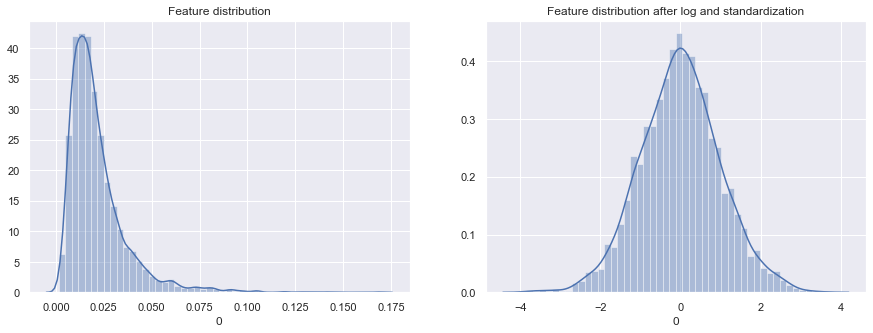

In [89]:
fig = plt.figure(figsize=(15,5))

index = 0

ax = fig.add_subplot(1,2,1)
ax.title.set_text('Feature distribution')
sns.distplot(data[index])

ax = fig.add_subplot(1,2,2)
ax.title.set_text('Feature distribution after log and standardization')
sns.distplot(data_transformed[index])

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCA_visualization(data):
    GroupedData = data.sort_values('Class')
    GroupedFeatures = GroupedData.drop(columns='Class')

    myPCA = PCA()
    myPCA.fit(StandardScaler().fit_transform(GroupedFeatures));
    transformed = myPCA.transform(GroupedFeatures)

    transformed = pd.DataFrame(transformed)
    transformed['Class'] = GroupedData['Class']
 
    ax = sns.scatterplot(x=0, y=1, hue='Class',data=transformed, alpha = 0.4)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    
#     print('Explained Variance Ratios: \n ',myPCA.explained_variance_ratio_)  


In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def LDA_visualization(data):

    lda_model = LinearDiscriminantAnalysis()
    transformed = pd.DataFrame(lda_model.fit_transform(data.drop(columns='Class'), data['Class']))
    transformed['Class'] = data['Class']

#     print('Explained Variance Ratio')
#     print(pd.DataFrame(lda_model.explained_variance_ratio_ ))
    
    sns.scatterplot(x=0, y=1, hue='Class', data=transformed, alpha=0.4)


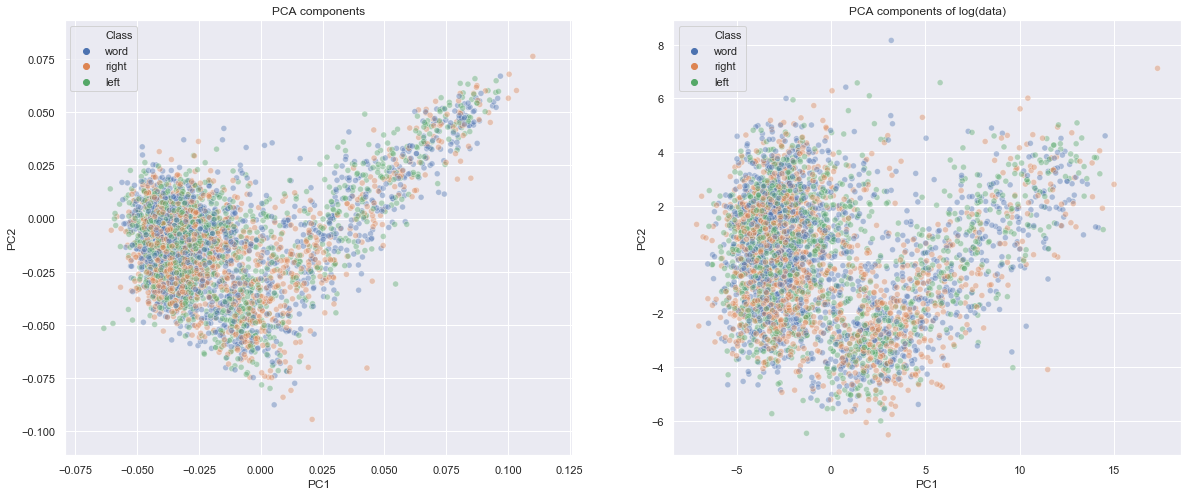

In [87]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,2,1)
ax.title.set_text('PCA components')
PCA_visualization(data)


ax = fig.add_subplot(1,2,2)
ax.title.set_text('PCA components of log(data)')
PCA_visualization(data_transformed)

C:\Users\joseb\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


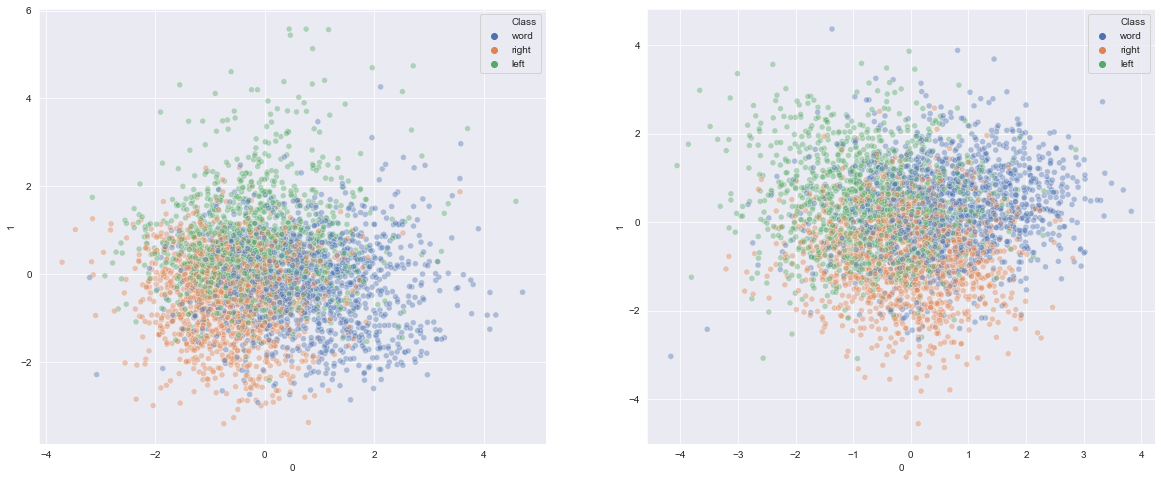

In [82]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,2,1)
LDA_visualization(data)

ax = fig.add_subplot(1,2,2)
LDA_visualization(data_transformed)

# 3. Modelling process

In [172]:
# prepare data for modeling and separate labels 

X_train = np.delete(training, 96, 1)
y_train = training[:,96]

X_test = np.delete(test, 96, 1) 
y_test = test[:,96] 

X_test1 = np.delete(test_subject1, 96, 1) 
y_test1 = test_subject1[:,96] 

X_test2 = np.delete(test_subject2, 96, 1) 
y_test2 = test_subject2[:,96] 

X_test3 = np.delete(test_subject3, 96, 1) 
y_test3 = test_subject3[:,96]  


# apply transformations

X_train =np.log(X_train)

X_test = np.log(X_test )

X_test1 =np.log(X_test1)
X_test2 =np.log(X_test2)
X_test3 =np.log(X_test3)

In [8]:
import time
from sklearn.model_selection import GridSearchCV

# Pre: X_train, y_train, X_test, y_test and  X_test<subject>, y_test<subject> are globally defined
# Post: Returns fitted model with the parameters of the 
#       best cross-validate score (if any hyperparameters to search, parameter_space != None) 
def execute(pipeline, parameter_space = None):
    
    start = time.time()
    
    model = None
    
    if (parameter_space == None):   #case with no hyperparameters to search (we can add cv too for an estimation of the test error)
        model = pipeline.fit(X_train, y_train)
        
    else:
        model = GridSearchCV(pipeline, parameter_space, cv = 5, iid=False, return_train_score=False, n_jobs= -1)
        model.fit(X_train, y_train)
    
    execution_time = time.time() - start 
    
    # Write important info
    print('Execution time: ', execution_time)
    if (parameter_space != None):
        print('Selected hyperparameters:\n', model.best_params_)  
    print("Test accuracy: ")
    print("\t subject1 -> ", model.score(X_test1, y_test1))
    print("\t subject2 -> ", model.score(X_test2, y_test2))
    print("\t subject3 -> ", model.score(X_test3, y_test3))
    print("\t GENERAL  -> ", model.score(X_test, y_test))
    
    return model


In [177]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# We need to do these preprocess steps inside the cross-validation (if not, test k-fold would be influenced by this preprocess)
# If inside the pipeline, every k-fold will apply the pipeline steps
scaler = StandardScaler()
pca = PCA(0.95)

# 3.1 Linear/Quadratic models

In [178]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf',GaussianNB())])
model = execute(pipeline)

Execution time:  0.026955842971801758
Test accuracy: 
	 subject1 ->  0.726027397260274
	 subject2 ->  0.5737327188940092
	 subject3 ->  0.4105504587155963
	 GENERAL  ->  0.5703363914373089


In [179]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', KNeighborsClassifier())])
parameter_space = {
    'clf__n_neighbors': np.arange(5,20),
    'clf__p': [1,2]   # 1 = manhattan, 2 = euclidean
}

model = execute(pipeline, parameter_space)

Execution time:  6.667445421218872
Selected hyperparameters:
 {'clf__n_neighbors': 18, 'clf__p': 2}
Test accuracy: 
	 subject1 ->  0.7831050228310502
	 subject2 ->  0.5576036866359447
	 subject3 ->  0.48853211009174313
	 GENERAL  ->  0.6100917431192661


In [89]:
from sklearn.neural_network import MLPClassifier

# MLP default solver = 'adam', activation = 'relu'
pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', MLPClassifier(max_iter=100))])

alphas = np.linspace(0.00001,0.02,20)
parameter_space = {
    'clf__alpha': alphas, 
    'clf__hidden_layer_sizes':[(5,),(10,),(15,)]
}

model = execute(pipeline, parameter_space)

Execution time:  22.424702644348145
Selected hyperparameters:
 {'clf__alpha': 0.007374736842105263, 'clf__hidden_layer_sizes': (10,)}
Test accuracy: 
	 subject1 ->  0.7602739726027398
	 subject2 ->  0.5368663594470046
	 subject3 ->  0.5022935779816514
	 GENERAL  ->  0.6001529051987767


C:\Users\joseb\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 3.2 Non-Linear models

In [180]:
from sklearn.svm import SVC

pipeline = Pipeline([('scaler', scaler), ('pca', pca), ('clf', SVC(random_state=1, gamma='scale'))])

model = execute(pipeline)

Execution time:  1.065692663192749
Test accuracy: 
	 subject1 ->  0.8059360730593608
	 subject2 ->  0.619815668202765
	 subject3 ->  0.5252293577981652
	 GENERAL  ->  0.650611620795107


In [73]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('scaler', scaler), ('clf', RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs=-1))])

model = execute(pipeline)

Execution time:  3.8404338359832764
Test accuracy: 
	 subject1 ->  0.8127853881278538
	 subject2 ->  0.6428571428571429
	 subject3 ->  0.5114678899082569
	 GENERAL  ->  0.6559633027522935


In [74]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('clf', RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs=-1))])

model = execute(pipeline)

Execution time:  4.021621465682983
Test accuracy: 
	 subject1 ->  0.8127853881278538
	 subject2 ->  0.6428571428571429
	 subject3 ->  0.5114678899082569
	 GENERAL  ->  0.6559633027522935
